In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Polynomial Interpolation

In this lab I study the different forms of polynomial interpolation stating with creating my own Newton's method. I also develop the algorithm for 2D Lagrange Interpolation. Finally in the third part of this project I demonstrate the diffrence in selecting nodes and the property that some sets of node are poor interpolating nodes while others are much better for certain functions

## Newton Interpolation

#### Creating the Newton Polynomial

Part one consisted of creating Newton's method for polynomial interpolation in the C++ class func_Newtonform.cpp. Newton's interpolating polynomial is defined as $$p_n(x) = a_0 + a_1(x-x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0)(x- x_1) ... (x - x_{n-1})$$
To define $a_0, a_1, ... , a_{n-1}$ I used the formula $$a_{n+1} = \frac{y_{n+1} - p_n(x_{n+1})} {(x_{n+1} - x_0)(x_{n+1} - x_1) ... (x_{n+1} - x_{n-1})}$$

In that class I implemented all the required aspects of creating Newton's interpolating polynomial in the methods
```cpp
double Newton_basis(Matrix& xnodes, int n, double x)

double Newton_nestedform(Matrix& a, Matrix& xnodes, double x)

Matrix Newton_coefficients(Matrix& xnodes, Matrix& ynodes)
```
These methods created Newton's interpolating polynomial with the nodes $(x_i, y_i) \in$ xnodes, ynodes; $i = 0, ..., n$ The method *Newton_basis* creates the Newton basis for $$\emptyset_{n+1}(x) = (x - x_0)(x- x_1) ... (x - x_n)$$ 

The next method *Newton_nestedform* calculates the value of $$p_n(x) = a_0 + a_1(x-x_0) + a_2(x - x_0)(x - x_1) + ... + a_n(x - x_0)(x- x_1) ... (x - x_{n-1})$$ with a given $x$ values and is used in deriving the $a_{n+1}$ node.

The final method *Newton_coefficients* creates the interpolating polynomials weights with the given nodes $(x_0, y_0), (x_1, y_1) , ... $. This function returns the weights in a matrix to be used to approximate a function.

#### Testing the Newton Polynomial

To test my algorithm I created a C++ class test_Newtonform.cpp. This class had the test function be $$f(x) = 3.1x^4 + 2.3x^3 - 6.6x^2 + 8.7x + 7.9$$ The nodes to use in the interpolation were also given as $x_i = -2, -1, 0, 1, 2$. With these five(n+1) nodes I created a degree 4(n) polynomial to approximate the function over the interval $[-3, 3]$. I used 201 linearly spaced points to compare the graphs. I expect that the interpolation will match exactly(within machine persicion) to the function given because of the **Theorem on Existence of Plynomial Interpolation**: *If points $x_0,  x_1, ..., x_n$ are distinct there is a unique polynomial p of degree n such that $p(x_i) = y_i$ for $0 \leq i \leq n$

In [3]:
x = loadtxt('x.txt')
f = loadtxt('f.txt')
p = loadtxt('p.txt')

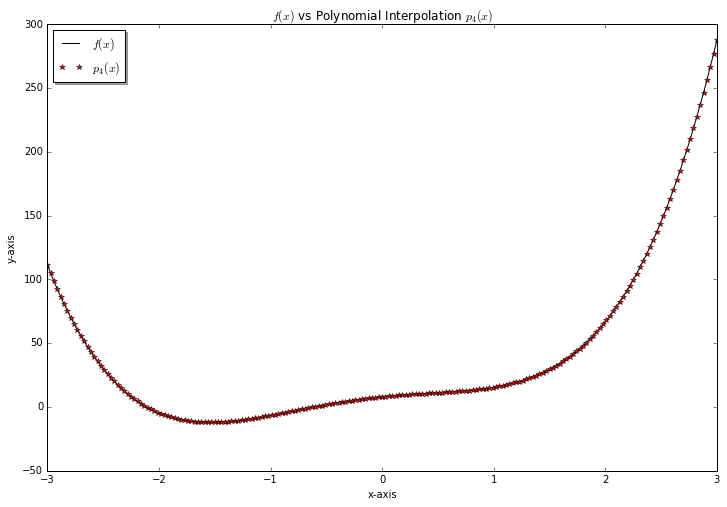

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,f,"k-", label="$f(x)$")
ax.plot(x,p,"r*", label="$p_4(x)$")
ax.set_title("$f(x)$ vs Polynomial Interpolation $p_4(x)$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

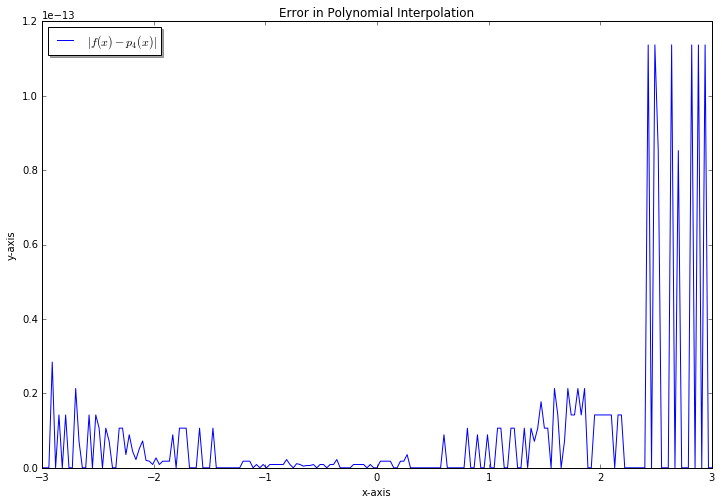

In [10]:
eOfp = abs(f-p)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(x,eOfp,"b-", label="$|f(x) - p_4(x)|$")
ax.set_title("Error in Polynomial Interpolation")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

legendPlot1 = ax.legend(loc="upper left", shadow=True)

plt.show()

The graphs show very will that my assumption was correct. The interpolating polynomial has a remarkable accuracy when it comes to perdicting the value of $f(x)$. The highest error is just below $1.2e^{-13}$ I atribute this error to the inacurate nature of double persicion machine floating point numbers.